In [1]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.0 MB/s 
     |████████████████████████████████| 5.3 MB 54.6 MB/s 
     |████████████████████████████████| 1.3 MB 58.1 MB/s 
     |████████████████████████████████| 163 kB 69.9 MB/s 
     |████████████████████████████████| 7.6 MB 58.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=c344c1d9900ef20656991fa5169c07424bef63da358af36ebf98c3f963bbf6ba
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [2]:
!wget https://raw.githubusercontent.com/k00lk0der1/submissions/main/enterpret/evaluation.csv
!wget https://raw.githubusercontent.com/k00lk0der1/submissions/main/enterpret/train.csv

--2022-10-15 08:25:01--  https://raw.githubusercontent.com/k00lk0der1/submissions/main/enterpret/evaluation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1120665 (1.1M) [text/plain]
Saving to: ‘evaluation.csv’

evaluation.csv      100%[===================>]   1.07M  --.-KB/s    in 0.005s  

2022-10-15 08:25:02 (210 MB/s) - ‘evaluation.csv’ saved [1120665/1120665]

--2022-10-15 08:25:02--  https://raw.githubusercontent.com/k00lk0der1/submissions/main/enterpret/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197974 (

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sentence_transformers import SentenceTransformer
import sklearn

In [4]:
def calculate_cosines(vector_list_1, vector_list_2):
    norm_vector_list_1 = vector_list_1/np.linalg.norm(vector_list_1, axis=-1, keepdims=True)
    norm_vector_list_2 = vector_list_2/np.linalg.norm(vector_list_2, axis=-1, keepdims=True)
    return (norm_vector_list_1*norm_vector_list_2).sum(axis=-1)

def custom_model_prediction(train_cosine_sim_scores, test_cosine_sim_scores):
    sorted_train_cosine_sim_scores = np.sort(train_cosine_sim_scores)
    return (sorted_train_cosine_sim_scores.reshape((1,-1))>=test_cosine_sim_scores.reshape((-1,1))).argmax(axis=-1)/sorted_train_cosine_sim_scores.shape[0]

In [5]:
train_data = pd.read_csv('train.csv')
evaluation_data = pd.read_csv("evaluation.csv")

In [6]:
models = [
    'all-MiniLM-L6-v2',
    'all-mpnet-base-v2',
    'multi-qa-mpnet-base-dot-v1',
    'multi-qa-distilbert-cos-v1',
    'multi-qa-MiniLM-L6-cos-v1',
    'all-distilroberta-v1',
    'all-MiniLM-L12-v2'
    ]
auc_roc_scores = {}

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.65k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.46k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/383 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/653 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

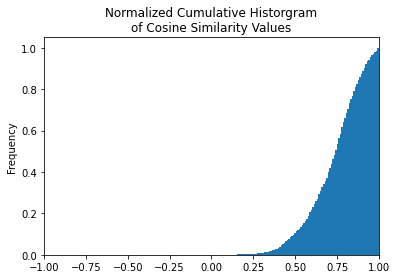

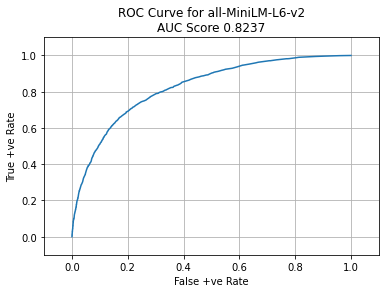

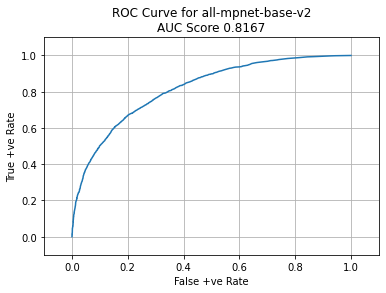

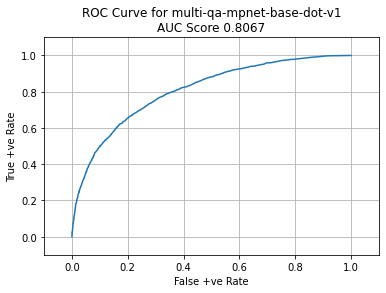

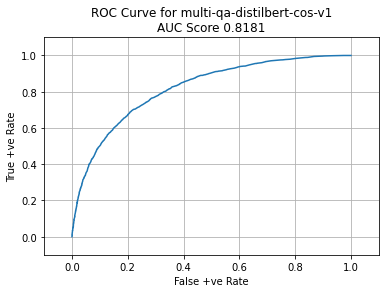

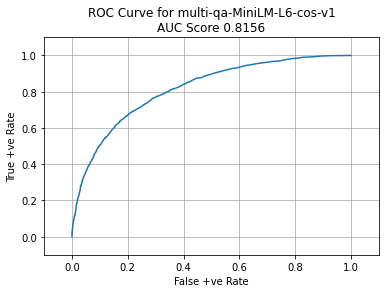

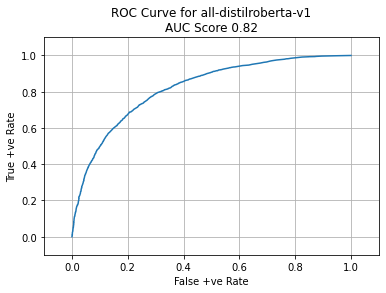

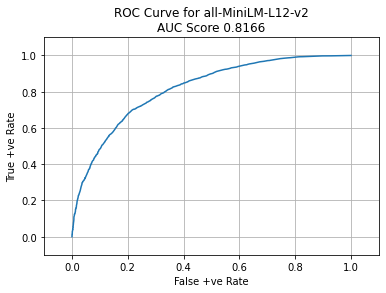

In [7]:
for model_id in models:
    model = SentenceTransformer(model_id)

    train_text = train_data['text'].tolist()
    train_reason = train_data['reason'].tolist()
    train_text_encoding = model.encode(train_text, show_progress_bar=True)
    train_reason_encoding = model.encode(train_reason, show_progress_bar=True)

    eval_text = evaluation_data['text'].tolist()
    eval_reason = evaluation_data['reason'].tolist()
    eval_text_encoding = model.encode(eval_text, show_progress_bar=True)
    eval_reason_encoding = model.encode(eval_reason, show_progress_bar=True)
    eval_y = evaluation_data['label'].values

    train_cosine_sim_scores = calculate_cosines(train_text_encoding, train_reason_encoding)
    eval_cosine_sim_scores = calculate_cosines(eval_text_encoding, eval_reason_encoding)

    if(model_id==models[0]):
        pd.Series(train_cosine_sim_scores, name='Cosine Values').plot(kind='hist', bins=100, xlim=(-1,1), xlabel='Cosine Value', ylabel='Density', title='Normalized Cumulative Historgram\nof Cosine Similarity Values', cumulative=True, density=True).get_figure().savefig('cosine_hist.jpg')

    eval_y_hat_p = custom_model_prediction(train_cosine_sim_scores, eval_cosine_sim_scores)

    auc_roc_scores[model_id] = sklearn.metrics.roc_auc_score(eval_y, eval_y_hat_p).round(4)

    roc_curve_data = pd.DataFrame(sklearn.metrics.roc_curve(eval_y, eval_y_hat_p),
                                index=['False +ve Rate', 'True +ve Rate', 'thresholds']).T
    newline = "\n"
    roc_curve_data.plot.line(x='False +ve Rate', 
                            y='True +ve Rate',
                            legend=False,
                            xlim=(-0.1,1.1),
                            ylim=(-0.1,1.1),
                            grid=True,
                            ylabel='True +ve Rate',
                            title=f"ROC Curve for {model_id}{newline}AUC Score {auc_roc_scores[model_id]}").get_figure().savefig(model_id+".jpg")
    
    

In [8]:
train_reason_cosine_sim_matrix = np.matmul(train_reason_encoding, train_reason_encoding.T)

negative_reason_weights = np.maximum(-train_reason_cosine_sim_matrix, 0)
negative_reason_weights_normalized = negative_reason_weights/(negative_reason_weights.sum(axis=-1, keepdims=True))
negative_reason_weights_cdf = negative_reason_weights_normalized.cumsum(axis=-1)

train_reason_cosine_sim_matrix.shape, negative_reason_weights_cdf.shape

((2061, 2061), (2061, 2061))

In [9]:
def train_batch_generator(batch_size_by_2=16):
    while(True):
        negative_idxs = np.random.choice(range(train_text_encoding.shape[0]), size=batch_size_by_2, replace=False)
        positive_idxs = np.random.choice(range(train_text_encoding.shape[0]), size=batch_size_by_2, replace=False)

        positive_text_encoding = train_text_encoding[positive_idxs]
        positive_reason_encoding = train_reason_encoding[positive_idxs]

        negative_text_encoding = train_text_encoding[negative_idxs]
        negative_reason_encoding_idxs = (negative_reason_weights_cdf[negative_idxs]>np.random.random(size=(batch_size_by_2,1))).argmax(axis=-1)
        negative_reason_encoding = train_reason_encoding[negative_reason_encoding_idxs]

        positive_x = np.concatenate([positive_text_encoding, positive_reason_encoding, positive_text_encoding*positive_reason_encoding], axis=-1)
        negative_x = np.concatenate([negative_text_encoding, negative_reason_encoding, negative_text_encoding*negative_reason_encoding], axis=-1)
        x = np.concatenate([positive_x, negative_x])
        y = np.array(([1]*batch_size_by_2)+([0]*batch_size_by_2))
        yield x,y

In [10]:
train_data_generator = train_batch_generator()

In [11]:
sample_x, sample_y = next(train_data_generator)
sample_x.shape, sample_y.shape

((32, 1152), (32,))

In [12]:
tf.keras.backend.clear_session()
classifier = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=sample_x[0].shape),
        tf.keras.layers.Dense(units=4096, activation='relu'),
        tf.keras.layers.Dense(units=4096, activation='relu'),
        tf.keras.layers.Dense(units=2048, activation='relu'),
        tf.keras.layers.Dense(units=2048, activation='relu'),
        tf.keras.layers.Dense(units=1024, activation='relu'),
        tf.keras.layers.Dense(units=256, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=16, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid'),
    ]

)
classifier.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [13]:
callbacks = [
             tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=50, verbose=1),
             tf.keras.callbacks.ModelCheckpoint('classifier.h5', save_best_only=True)
            ]
classifier.fit(train_data_generator, validation_data=(sample_x, sample_y), steps_per_epoch=50, epochs = 250, callbacks=callbacks)

Epoch 1/250
50/50 [==============================] - 2s 28ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/250
50/50 [==============================] - 1s 26ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/250
50/50 [==============================] - 1s 27ms/step - loss: 0.6931 - accuracy: 0.5025 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 4/250
50/50 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 5/250
50/50 [==============================] - 2s 32ms/step - loss: 0.6930 - accuracy: 0.5213 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 6/250
50/50 [==============================] - 1s 25ms/step - loss: 0.6929 - accuracy: 0.5269 - val_loss: 0.6927 - val_accuracy: 0.5312
Epoch 7/250
50/50 [==============================] - 1s 24ms/step - loss: 0.6930 - accuracy: 0.5213 - val_loss: 0.6927 - val_accuracy: 0.5625
Epoch 

In [14]:
classifier = tf.keras.models.load_model('classifier.h5', compile=False)

In [15]:
eval_x = np.concatenate([eval_text_encoding, eval_reason_encoding, eval_text_encoding*eval_reason_encoding], axis=-1)

In [16]:
eval_y_hat_p = classifier.predict(eval_x, batch_size=1024).flatten()

9/9 [==============================] - 0s 18ms/step


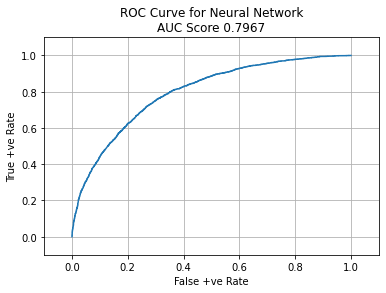

In [17]:
model_id="Neural Network"

auc_roc_scores[model_id] = sklearn.metrics.roc_auc_score(eval_y, eval_y_hat_p).round(4)

roc_curve_data = pd.DataFrame(sklearn.metrics.roc_curve(eval_y, eval_y_hat_p),
                            index=['False +ve Rate', 'True +ve Rate', 'thresholds']).T
roc_curve_data.plot.line(x='False +ve Rate', 
                        y='True +ve Rate',
                        legend=False,
                        xlim=(-0.1,1.1),
                        ylim=(-0.1,1.1),
                        grid=True,
                        ylabel='True +ve Rate',
                        title=f"ROC Curve for {model_id}{newline}AUC Score {auc_roc_scores[model_id]}").get_figure().savefig(model_id+".jpg")

In [18]:
auc_roc_scores

{'all-MiniLM-L6-v2': 0.8237,
 'all-mpnet-base-v2': 0.8167,
 'multi-qa-mpnet-base-dot-v1': 0.8067,
 'multi-qa-distilbert-cos-v1': 0.8181,
 'multi-qa-MiniLM-L6-cos-v1': 0.8156,
 'all-distilroberta-v1': 0.82,
 'all-MiniLM-L12-v2': 0.8166,
 'Neural Network': 0.7967}